<function matplotlib.pyplot.legend(*args, **kwargs)>

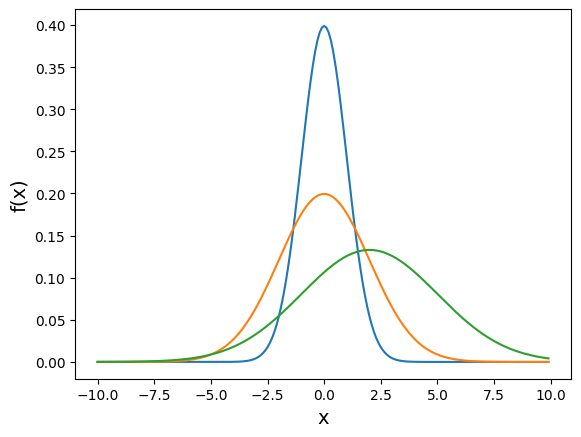

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def np_gaussian_pdf(domain, mu, sigma2, sample=0.2):  # domain : 영역, x의 range, mu : 평균, sigma2 : 분산, sample : 간격
  X = np.arange(-domain, domain, sample)
  sigma = np.sqrt(sigma2)
  z = ((1. / (sigma * np.sqrt(2 * np.pi))) * np.exp(-.5*((X-mu)/sigma)**2)) # Gaussian 분포 식
  return X,z

plt.plot(*np_gaussian_pdf(10, 0, 1, 0.1), label = "mu=0, sigma^2=1")
plt.plot(*np_gaussian_pdf(10, 0, 4, 0.1), label = "mu=0, sigma^2=4")
plt.plot(*np_gaussian_pdf(10, 2, 9, 0.1), label = "mu=2, sigma^2=9")

plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend

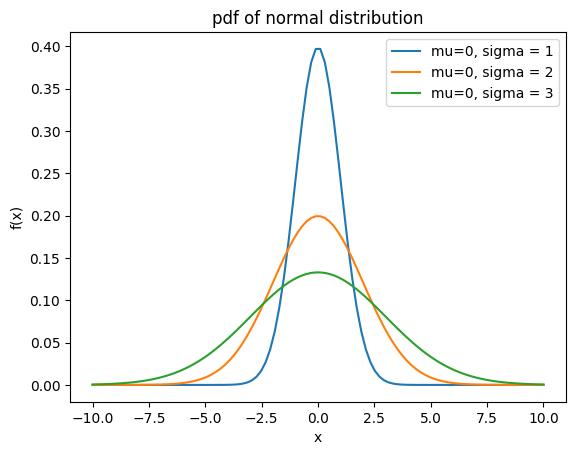

In [2]:
import scipy as sp
from scipy import stats # scipy 안에 통계 모듈을 import 한다.

xx = np.linspace(-10, 10, 100) # 위의 코드와는 다르게 linsapce에서는 (음의 영역, 양의 영역, 샘플 개수)를 파라미터로 갖는다.
mu = 0
std = 1
rv = sp.stats.norm(mu, std) # **.norm(기대값, 표준편차)
plt.plot(xx, rv.pdf(xx), label = "mu=0, sigma = 1")
rv = sp.stats.norm(0, 2)
plt.plot(xx, rv.pdf(xx), label = "mu=0, sigma = 2")
rv = sp.stats.norm(0, 3)
plt.plot(xx, rv.pdf(xx), label = "mu=0, sigma = 3")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("pdf of normal distribution")
plt.legend()
plt.show()

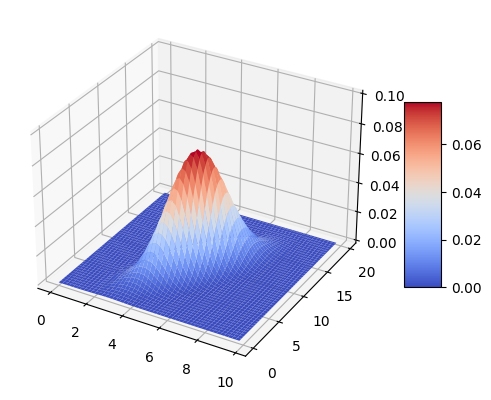

In [3]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection = '3d')

# Make Data.
X = np.arange(0, 10, 0.2) # array 의 길이 50
Y = np.arange(0, 20, 0.2) # array의 길이 100
X, Y = np.meshgrid(X, Y) # 50*100의 크기의 grid 형태의 샘플링 값을 얻어냄

mu = [5, 9]
cov = [[1,2], [2,8]] # 2x2 행렬의 공분산
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap='coolwarm') # 3차원의 plot을 그려냄
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

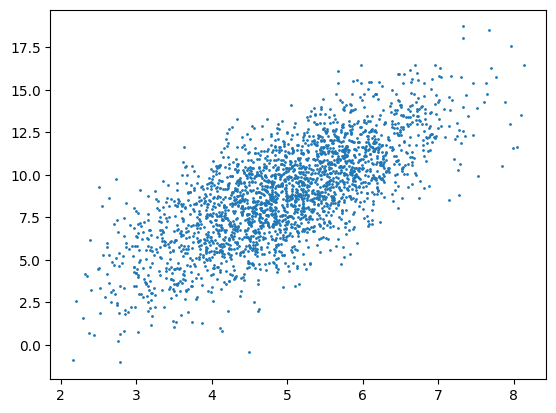

In [4]:
mu = [5, 9]
cov = [[1,2], [2,8]]
x = np.random.multivariate_normal(mu, cov, (50,50)) # x.shape = (50, 50, 2)
plt.scatter(x[:,:,0], x[:,:,1], s=1) # 분산 plot을 그리는 함수
plt.show()

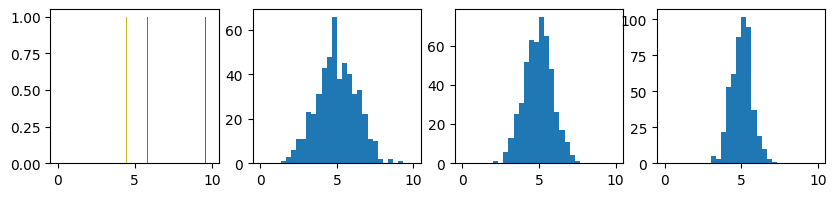

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

s = np.random.uniform(low=0, high=10, size=10000) # 균등 분포를 갖는 10000개의 샘플 데이터를 가짐
bins = 30
ranges = (0, 10)

fig, axes = plt.subplots(1, 4, figsize=(10,2))
samples = [random.choices(s) for _ in range(500)]
axes[0].hist(samples, bins, ranges)
samples = [np.mean(random.choices(s, k=5)) for _ in range(500)]
axes[1].hist(samples, bins, ranges)
samples = [np.mean(random.choices(s, k=10)) for _ in range(500)]
axes[2].hist(samples, bins, ranges)
samples = [np.mean(random.choices(s, k=20)) for _ in range(500)]
axes[3].hist(samples, bins, ranges)
plt.show()

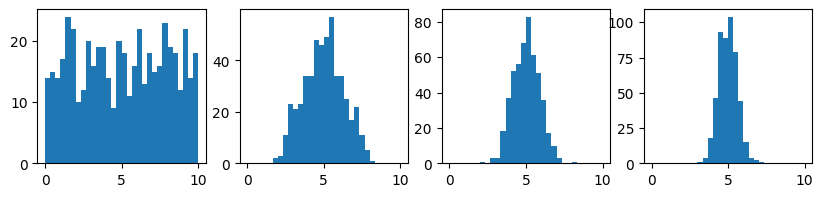

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

#s = random.choice(s) for _ in range(500)
s = np.random.uniform(low=0, high=10, size=10000)
bins = 30
ranges = (0,10)

fig, axes = plt.subplots(1,4, figsize=(10,2))
samples = [ random.choice(s) for _ in range(500) ] 
axes[0].hist(samples,bins,ranges)
samples = [ np.mean(random.choices(s,k=5)) for _ in range(500) ]
axes[1].hist(samples,bins,ranges)
samples = [ np.mean(random.choices(s,k=10)) for _ in range(500) ]
axes[2].hist(samples,bins,ranges)
samples = [ np.mean(random.choices(s,k=20)) for _ in range(500) ]
axes[3].hist(samples,bins,ranges)
plt.show()

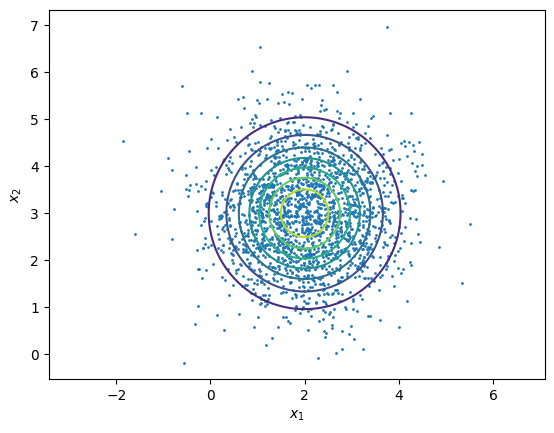

In [10]:
mu = [2,3]
cov = [[1,0], [0,1]]

rv = sp.stats.multivariate_normal(mu, cov) # 지정된 평균(mu)과 공분산 행렬(cov)을 사용하여 다변량 정규 분포의 인스턴스를 생성하고 이를 변수 rv에 할당합니다.
X = rv.rvs(2000) # rv로 표현되는 다변량 정규분포에서 무작위 샘플(점)을 생성합니다.

xx = np.linspace(-1, 5, 120) # np.linspace(a, b, n)은 a에서 b까지 n개의 등간격으로 값을 생성합니다. 이 경우, -1에서 5까지의 범위에서 120개의 값이 생성됩니다.
yy = np.linspace(-0, 6, 120)
XX, YY = np.meshgrid(xx, yy) # np.meshgrid() 함수는 두 개의 1차원 배열을 받아서 이를 기반으로 2차원 그리드를 생성합니다.

plt.scatter(X[:, 0], X[:, 1], s=1)
# plt.scatter() 함수는 산점도를 생성하는 Matplotlib 함수입니다.
# X[:, 0]은 X의 모든 행에서 첫 번째 열을 선택합니다. 이는 x 좌표로 사용됩니다.
# X[:, 1]은 X의 모든 행에서 두 번째 열을 선택합니다. 이는 y 좌표로 사용됩니다.
# s=1은 점의 크기를 나타냅니다. 여기서는 1로 설정되어 작은 크기의 점을 사용합니다.
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY]))) # rv.pdf(np.dstack([XX, YY]))는 XX와 YY를 이용하여 다변량 정규 분포 rv의 확률 밀도 함수 값을 계산합니다.
# np.dstack([XX, YY])는 XX와 YY를 쌓아서 3차원 배열을 만듭니다. 이는 rv.pdf() 함수에 들어가는 인자로 사용됩니다.
plt.axis("equal")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

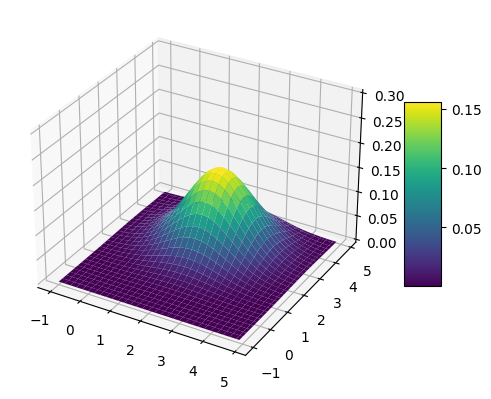

In [12]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

# make data
X = np.arange(-1, 5, 0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [2,3]
cov = [[1,0], [0,1]]
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap="viridis")
ax.set_zlim(0, 0.3)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


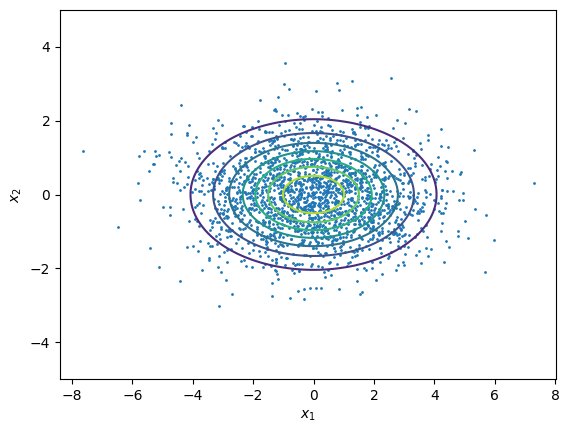

In [13]:
mu = [0, 0]
cov = [[4, 0], [0, 1]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(2000)

xx = np.linspace(-5, 5, 120)
yy = np.linspace(-5, 5, 120)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

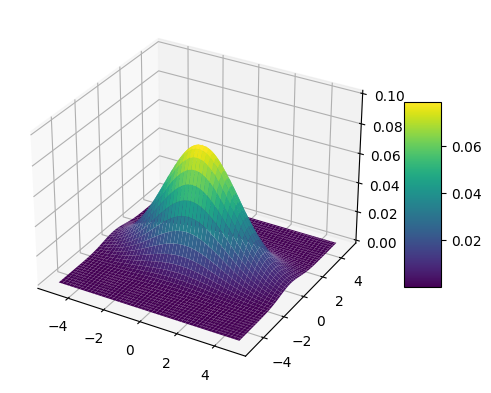

In [18]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

# make data
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [0,0]
cov = [[4,0], [0,1]]
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap="viridis")
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


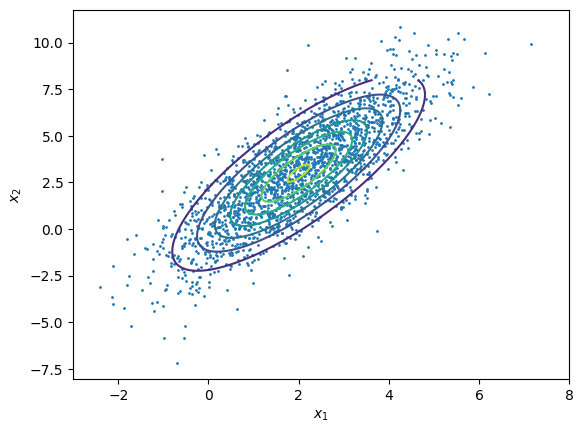

In [20]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(2000)

xx = np.linspace(-3, 8, 120)
yy = np.linspace(-3, 8, 120)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


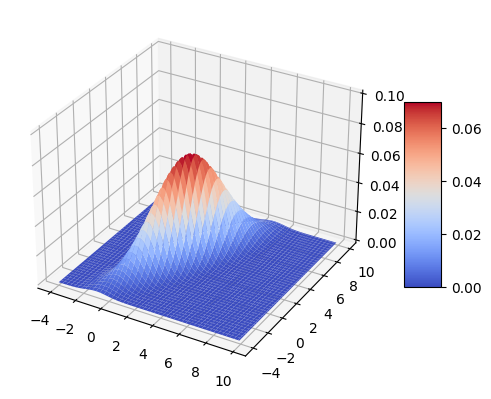

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-4, 10, 0.1)
Y = np.arange(-4, 10, 0.1)
X, Y = np.meshgrid(X, Y)

mu = [2, 3]
cov = [[2, 3], [3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
Z = rv.pdf(np.dstack([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Customize the z axis.
ax.set_zlim(0, 0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()